In [ ]:
# Ejemplo de wavelet

In [140]:
# Librerías a usar

from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy.polynomial.polynomial as poly
import matplotlib
import matplotlib.patches as mpatches

from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

In [141]:
# Path de los archivos que quiero abrir
path = '/run/media/cecere/7d4a4576-37a1-4a7a-bcab-27905bc96ce8/Backup_femputadora/data_loop/'
simulacion ='pulso_3'

In [142]:
g = h5py.File(path+simulacion+'/'+'welbalanced_hdf5_plt_cnt_0000','r')

In [143]:
ncx1b  = list(g['integer scalars'][0])[1]     # Número de celdas en un bloque en x
ncy1b  = list(g['integer scalars'][1])[1]     # Número de celdas en un bloque en y
boundb = g['bounding box'][:,:,:]           # Coordenada central de cada bloque
    
niprocs = list(g['integer scalars'][7])[1]     # Número de procesadores usados en x = número de bloques en x
njprocs = list(g['integer scalars'][8])[1]     # Número de procesadores usados en y = número de bloques en y

In [144]:
# Defino deltaxb: coordenada x ([0]) del segundo bloque en x [1] menos el primer bloque [0].
deltaxb = np.abs(list(g['coordinates'][1])[0]-list(g['coordinates'][0])[0])

# Defino deltax: deltaxb entre los centros de los primeros 2 bloques / número de celdas en 1 bloque
deltax = deltaxb/ncx1b

# Defino deltayb: coordenada y ([1]) del segundo bloque en y [niprocs] menos el primer bloque [0].
deltayb = np.abs(list(g['coordinates'][niprocs])[1]-list(g['coordinates'][0])[1])

# Defino deltay: deltayb entre los centros de los primeros 2 bloques / número de celdas en 1 bloque
deltay = deltayb/ncy1b

# Defino xmin = valor en x del centro del bloque cero - 1/2 del deltax de 1 bloque
xmin = list(g['coordinates'][0])[0] - 0.5*deltaxb

# Defino xmax = valor en x del centro del bloque niprocs-1 + 1/2 del deltax de 1 bloque
xmax = list(g['coordinates'][niprocs-1])[0] + 0.5*deltaxb

# Defino ymin = valor en y del centro del bloque cero - 1/2 del deltay de 1 bloque
ymin = list(g['coordinates'][0])[1] - 0.5*deltayb

# Defino ymax = valor en y del centro del bloque (niprocs-1)*njprocs + 1/2 del deltay de 1 bloque
ymax = list(g['coordinates'][(niprocs-1)*njprocs])[1] + 0.5*deltayb

In [145]:
# Quiero elegir un punto, y graficar la propiedad en el tiempo
# Doy el punto en coordenadas físicas:
xm = 0.2e8
ym = 20e8
# Encuentro el bloque en x:
ibx = int(xm*niprocs/(xmax-xmin))
#print(ibx)
# Encuentro el bloque en y:
iby = int(ym*njprocs/(ymax-ymin))
#print(iby)
# Entonces el índice del bloque es: 
ib = niprocs*iby+ibx
#print(ib)
# Calculo el indice en x dado el bloque
ixb = int((xm-ibx*(xmax-xmin)/niprocs)*niprocs/(xmax-xmin)*ncx1b)
#print(ixb)
# Calculo el indice en y dado el bloque
iyb = int((ym-iby*(ymax-ymin)/njprocs)*njprocs/(ymax-ymin)*ncy1b)
#print(iyb)
# Luego, la coordenada dado xm e ym sera [ib,0,iyb,ixb]
#print(f['dens'][ib,0,iyb,ixb])

In [255]:
# Defino los índices de tiempo mínimo y máximo
itmin = 120
itmax = 900
# Defino el tiempo físico
dt=0.5
time=np.arange(itmin, itmax+1)*dt # 1 plot cada 0.5 segundos
print(len(time))
print(time)
print(time[itmax-itmin])

# Inicializo la variable
ddens = np.zeros(len(time))
#print(pdens)
for i in range(itmin,itmax+1):
#    print('i=',i)
    if   i < 10 :       # Poner el path que corresponda
        f = h5py.File(path+simulacion+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
    elif i < 100 :
        f = h5py.File(path+simulacion+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
    elif i < 1000 :
        f = h5py.File(path+simulacion+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
    else :
        f = h5py.File(path+simulacion+'/'+'welbalanced_hdf5_plt_cnt_'+str(i),'r')
#    print(f)
    # Construyo el array de datos
    ddens[i-itmin] = f['pres'][ib,0,iyb,ixb]

# Defino el tamaño del array
N = ddens.size
#help(ddens)
#print(ddens.shape)
#print(ddens)
#print(N)

781
[ 60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  82.   82.5  83.   83.5
  84.   84.5  85.   85.5  86.   86.5  87.   87.5  88.   88.5  89.   89.5
  90.   90.5  91.   91.5  92.   92.5  93.   93.5  94.   94.5  95.   95.5
  96.   96.5  97.   97.5  98.   98.5  99.   99.5 100.  100.5 101.  101.5
 102.  102.5 103.  103.5 104.  104.5 105.  105.5 106.  106.5 107.  107.5
 108.  108.5 109.  109.5 110.  110.5 111.  111.5 112.  112.5 113.  113.5
 114.  114.5 115.  115.5 116.  116.5 117.  117.5 118.  118.5 119.  119.5
 120.  120.5 121.  121.5 122.  122.5 123.  123.5 124.  124.5 125.  125.5
 126.  126.5 127.  127.5 128.  128.5 129.  129.5 130.  130.5 131.  131.5
 132.  132.5 133.  133.5 134.  134.5 135.  135.5 136.  136.5 137.  137.5
 138.  138.5 139.  139.5 140.  140.5 141.  141.

Text(0.5, 0, 't [s]')

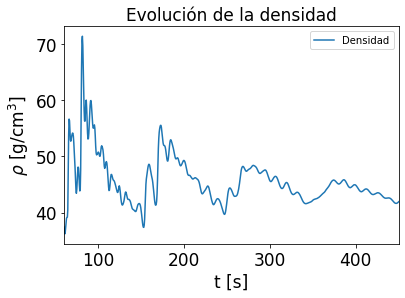

In [256]:
# Grafico la variable
pdens, = plt.plot(time,ddens,label='Densidad')
plt.legend(handles=[pdens])
    #plt.legend(handles=[pdens,pmagy])
plt.tick_params( labelsize=17)
plt.xlim(time[itmin-itmin], time[itmax-itmin])
#plt.ylim(emin, emax)
plt.title('Evolución de la densidad',fontsize=17)
plt.ylabel( r'$\rho$ [g/cm$^3$]',fontsize=17)
plt.xlabel('t [s]',fontsize=17)
#plt.savefig(path+simulacion +'/'+pos+'_energia.pdf', bbox_inches='tight')

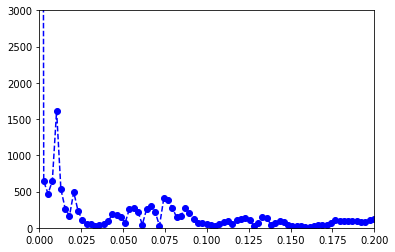

In [260]:
# Hago el cálculo de la transformada de Fourier real de los datos
yf = rfft(ddens)
xf = rfftfreq(N,1/2)

plt.plot(xf, np.abs(yf), linestyle='--', marker='o', color='b')
plt.xlim(0, 0.2)
plt.ylim(0, 3000)
plt.show()

In [261]:
#help(fftfreq)
#help(fft)

In [262]:
#help(numpy.polyfit)

In [263]:
# polyfit(x, y, deg)
# Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
# to points `(x, y)`. Returns a vector of coefficients `p` that minimises
# the squared error in the order `deg`, `deg-1`, ... `0`.
# Construyo linealmente cómo decae la variable
p = numpy.polyfit(time - time[0], ddens, 1)
print(p)
# Construyo los datos sin esa tendencia
dat_notrend = ddens - numpy.polyval(p, time - time[0])
#print(dat_notrend)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset
print(std)
print(var)

[-1.59863427e-02  4.87938640e+01]
3.9929896291769458
15.943966178714643


<function matplotlib.pyplot.show(close=None, block=None)>

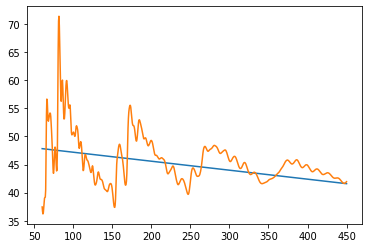

In [265]:
plt.plot(time,p[0] * (time)**1 + p[1])
#plt.plot(time-time[0],p[0] * (time-time[0])**1 + p[1])
plt.plot(time,ddens)
plt.show

Text(0.5, 0, 't [s]')

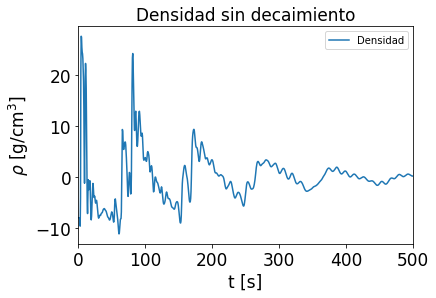

In [211]:
# Grafico la variable sin la tendencia
pdensnotrend, = plt.plot(time,dat_notrend,label='Densidad')
plt.legend(handles=[pdensnotrend])
plt.tick_params( labelsize=17)
plt.xlim(time[itmin-itmin], time[itmax-itmin])
#plt.ylim(emin, emax)
plt.title('Densidad sin decaimiento',fontsize=17)
plt.ylabel( r'$\rho$ [g/cm$^3$]',fontsize=17)
plt.xlabel('t [s]',fontsize=17)

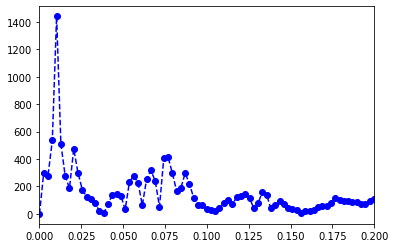

In [266]:
# Hago el cálculo de la transformada de Fourier real de los datos sin tendencia
yf = rfft(dat_notrend)
xf = rfftfreq(N,1/2)

plt.plot(xf, np.abs(yf), linestyle='--', marker='o', color='b')
plt.xlim(0, 0.2)
plt.show()

In [213]:
# Calculo la transformada de Fourier real, pero con el programa wavelet
wffty = wavelet.fft.rfft(dat_notrend)
print(wffty.shape)
wfftx = wavelet.fft.rfftfreq(N,1/2)
print(wfftx)

(1001,)
[0.       0.001998 0.001998 ... 0.997003 0.999001 0.999001]


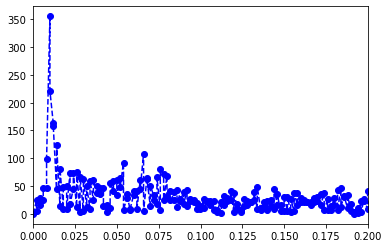

In [267]:
# Grafico la TF
plt.plot(wfftx, np.abs(wffty), linestyle='--', marker='o', color='b')
plt.xlim(0, 0.2)
plt.show()

Text(0.5, 0, 't [s]')

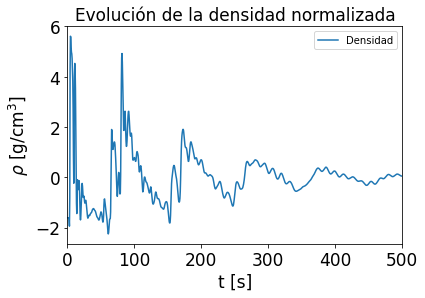

In [215]:
# Grafico la variable normalizada y sin la tendencia
pdensnorm, = plt.plot(time,dat_norm,label='Densidad')
plt.legend(handles=[pdensnorm])
plt.tick_params( labelsize=17)
plt.xlim(time[itmin-itmin], time[itmax-itmin])
#plt.ylim(emin, emax)
plt.title('Evolución de la densidad normalizada',fontsize=17)
plt.ylabel( r'$\rho$ [g/cm$^3$]',fontsize=17)
plt.xlabel('t [s]',fontsize=17)

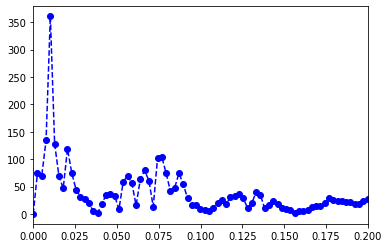

In [268]:
# Hago el cálculo de la transformada de Fourier real de los datos normalizados
yf = rfft(dat_norm)
xf = rfftfreq(N,1/2)

plt.plot(xf, np.abs(yf), linestyle='--', marker='o', color='b')
plt.xlim(0, 0.2)
plt.show()

In [217]:
#help(wavelet.fft)

In [218]:
#print(dat_notrend)

In [269]:
# Calculo la transformada de Fourier real, pero con el programa wavelet
wffty = wavelet.fft.rfft(dat_norm)
print(wffty.shape)
wfftx = wavelet.fft.rfftfreq(N,1/2)
print(wfftx)

(781,)
[0.         0.00256082 0.00256082 0.00512164 0.00512164 0.00768246
 0.00768246 0.01024328 0.01024328 0.0128041  0.0128041  0.01536492
 0.01536492 0.01792574 0.01792574 0.02048656 0.02048656 0.02304738
 0.02304738 0.02560819 0.02560819 0.02816901 0.02816901 0.03072983
 0.03072983 0.03329065 0.03329065 0.03585147 0.03585147 0.03841229
 0.03841229 0.04097311 0.04097311 0.04353393 0.04353393 0.04609475
 0.04609475 0.04865557 0.04865557 0.05121639 0.05121639 0.05377721
 0.05377721 0.05633803 0.05633803 0.05889885 0.05889885 0.06145967
 0.06145967 0.06402049 0.06402049 0.06658131 0.06658131 0.06914213
 0.06914213 0.07170294 0.07170294 0.07426376 0.07426376 0.07682458
 0.07682458 0.0793854  0.0793854  0.08194622 0.08194622 0.08450704
 0.08450704 0.08706786 0.08706786 0.08962868 0.08962868 0.0921895
 0.0921895  0.09475032 0.09475032 0.09731114 0.09731114 0.09987196
 0.09987196 0.10243278 0.10243278 0.1049936  0.1049936  0.10755442
 0.10755442 0.11011524 0.11011524 0.11267606 0.11267606 

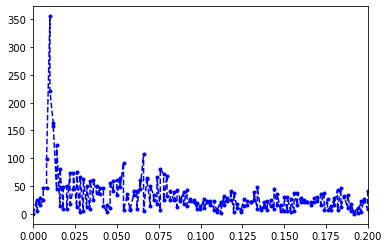

In [220]:
plt.plot(wfftx, np.abs(wffty), linestyle='--', marker='.', color='b')
plt.xlim(0, 0.2)
plt.show()

In [221]:
#help(wavelet.ar1)
#help(wavelet.Morlet)

In [286]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.5 seconds = 1 second
#dj = 1 / 12  # Twelve sub-octaves per octaves
dj = 1 / 100
J = 10 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat_norm)  # Lag-1 autocorrelation for red noise

In [287]:
#help(wavelet.cwt)

In [288]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [289]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
fft_abs = numpy.abs(fft)
period = 1 / freqs
periodfft = 1 / fftfreqs
#print(power)
print(power.shape)

(1001, 781)


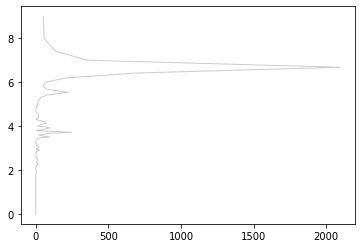

In [290]:
plt.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',        linewidth=1.)
plt.show()

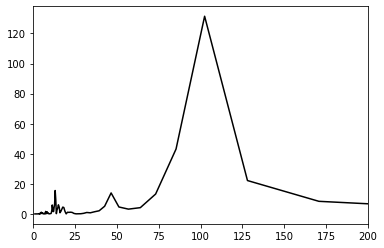

In [291]:
plt.plot(periodfft,fft_power.real,'k',linewidth=1.5,label='datos')
plt.xlim(0, 200)
plt.show()

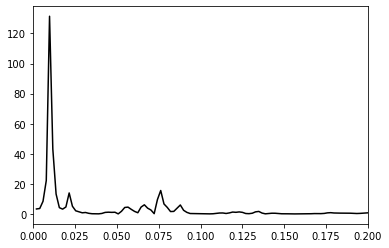

In [292]:
plt.plot(fftfreqs,fft_power.real,'k',linewidth=1.5,label='datos')
plt.xlim(0, 0.2)
plt.show()

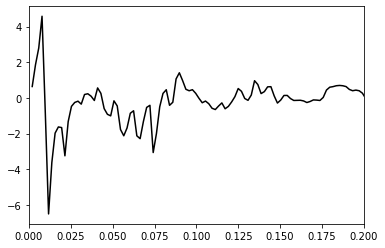

In [293]:
plt.plot(fftfreqs,fft.real,'k',linewidth=1.5,label='datos')
#plt.plot(fftfreqs,fft_power.real,'k',linewidth=1.5,label='datos')
plt.xlim(0, .200)
plt.show()

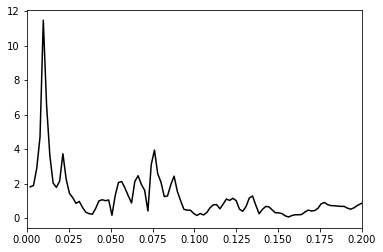

In [294]:
plt.plot(fftfreqs,fft_abs,'k',linewidth=1.5,label='datos')
#plt.plot(fftfreqs,fft_power.real,'k',linewidth=1.5,label='datos')
plt.xlim(0, .200)
plt.show()

In [295]:
power /= scales[:, None]
#print(power)

In [296]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95
#print(sig95)
#print(fft_theor)

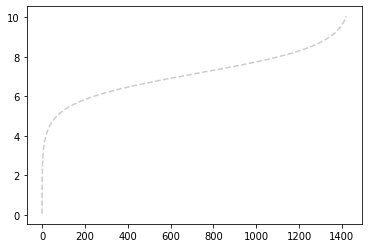

In [297]:
plt.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
plt.show()

In [298]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)
#print(glbl_power)
#print(power.shape)
#print(period)

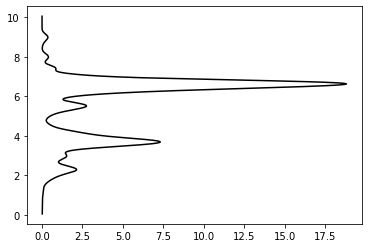

17.124673247645436

In [299]:
plt.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
plt.show()
glbl_power.max() + var

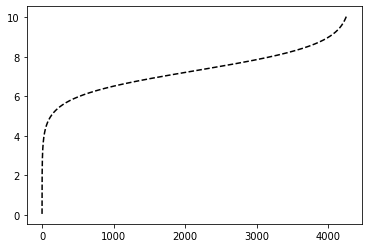

In [300]:
plt.plot(glbl_signif, numpy.log2(period), 'k--')
plt.show()


In [301]:
# Aca debo seleccionar la ventana de tiempos que quiero ver. Lo veo a partir de las TF que hice antes.
#sel = find((period >= 2) & (period < 8))
sel = find((period >= 1) & (period < 300))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

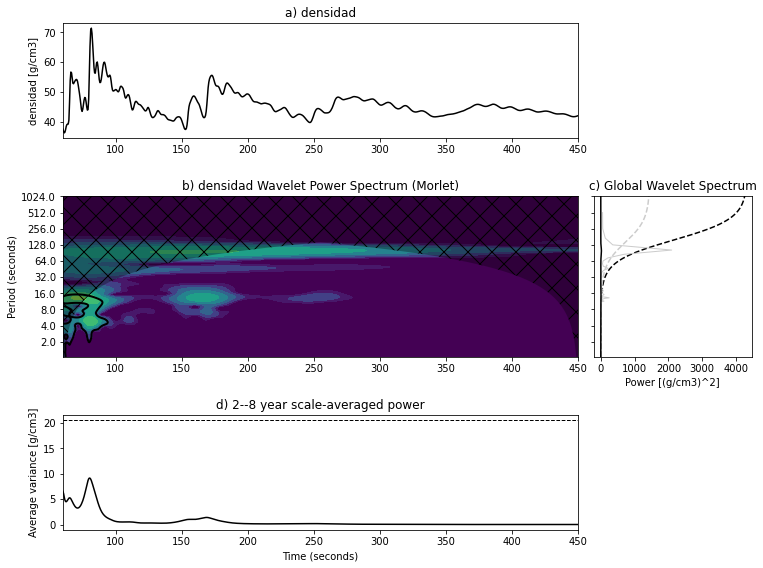

In [302]:
t=time
dat=ddens
title = 'densidad'
label = 'densidad'
units = 'g/cm3'

# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
#ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (seconds)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
#cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (seconds)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()